In [458]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#DATA PROCESSING
#Encoding
from sklearn.preprocessing import LabelEncoder
#Second label encoder we are trying later
from sklearn.preprocessing import OneHotEncoder

#splitting data
from sklearn.model_selection import train_test_split

#Normalizing after split, as intended to prevent data leakage
from sklearn.preprocessing import MinMaxScaler





#MACHINE LEARNING MODESL
  #Random Forest 
from sklearn.ensemble import RandomForestClassifier
  #Logistic reg
from sklearn.linear_model import LogisticRegression
  #Decision tree classifier

from sklearn.tree import DecisionTreeClassifier



#Model eval
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

#Classification reports
from sklearn.metrics import accuracy_score, classification_report

#Kappa score
from sklearn.metrics import cohen_kappa_score

#Confusion matrix
from sklearn.metrics import confusion_matrix

#cross val scoring 
from sklearn.model_selection import cross_val_score


In [459]:
#Data processing, examine features and process df for red wine 
dfwhite = pd.read_csv("wine_data/winequality-white.csv", sep = ";")

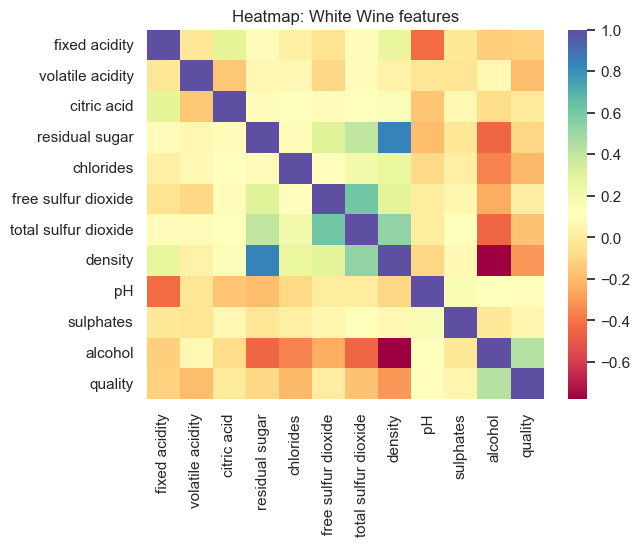

In [460]:
#Heatmap to guide feature selection
corr = dfwhite.corr()

sns.heatmap(corr, annot=False, cmap='Spectral',)



#plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

# Add title
plt.title('Heatmap: White Wine features')

plt.show()


In [461]:
#Can drop columns in future 
#"citric acid","pH","sulphates","fixed acidity","sulphates" "citric acid"
dfwhite = dfwhite.drop(columns=["sulphates","pH"],axis = 1, inplace = False)
dfwhite


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,9.9,6
...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,12.8,7


In [462]:
#Check skew 
print(dfwhite['quality'].astype(float).skew())

print(dfwhite['quality'].astype(float).kurt())

0.15579639772222578
0.21652582721530989


In [463]:
#categorize quality
dfwhite["quality_label"] = dfwhite['quality'].apply(lambda value: "poor"
                                                                if value <= 3 else "low"
                                                                if value <= 5 else "medium"
                                                                if value <= 6 else "high"
                                                                if value <= 8 else "exceptional") 



#dfwhite["quality_label"] = pd.Categorical(dfwhite["quality_label"], categories = ["poor","low","medium","high","exceptional"])
dfwhite["quality_label"] = pd.Categorical(dfwhite["quality_label"], categories = ["poor","low","medium","high","exceptional"])

#dfwhite = dfwhite.query("quality_label == 'low' or quality_label =='medium' or quality_label =='high'")
###2ND CATEGORIZATION; REMOVING EXTRA CATEGORIES FOR LOW AND EXCEPTIONAL 
dfwhite["quality_label"] = dfwhite['quality'].apply(lambda value: "low"
                                                                if value <= 5 else "medium"
                                                                if value <= 6 else "high") 

dfwhite["quality_label"] = pd.Categorical(dfwhite["quality_label"], categories = ["low","medium","high"])
#dfwhite.head(5)

# Initialize LabelEncoder


#LABEL ENCODER WASNT GOOD FOR THIS; NEED A CATEGORICAL ENCODER to do a better job, like one hot encoder
le = LabelEncoder()

# Fit the LabelEncoder to the data
#le.fit(["low","medium","high"])
le.fit(["poor","low","medium","high","exceptional"])
le.classes_

# Transform the data into numerical labels
dfwhite["quality_label"] = le.transform(dfwhite["quality_label"])

#To decode the encoded labels, use the inverse_transform method: dfwhite["quality_label"]  = le.inverse_transform(dfwhite["quality_label"])
#dfwhite = pd.get_dummies(dfwhite,columns=["quality_label"],drop_first=True)


###SECOND ITER ENCODING COULDNT MANAGE

# Create a OneHotEncoder object
#enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to the data and transform the 'color' column
#X = [['poor', 0], ['low', 1], ['medium', 2],['high', 3],['exceptional',4]]

#enc.fit(X)
# Transform the categorical column into binary vectors
#encoded_df = pd.DataFrame(enc.transform(dfwhite[["quality_label"]]).toarray(), columns=enc.get_feature_names())
dfwhite
#dfwhite["quality_label"] = enc.transform(dfwhite["quality_label"])

#encoded_df.head(5)


#data = pd.get_dummies(dfwhite,prefix=['quality_label'], columns = ['quality_label'], drop_first=True)
#data.head(5)
#transformed = enc.transform(data['quality_label'].to_numpy().reshape(-1, 1))
#Create a Pandas DataFrame of the hot encoded column
#ohe_df = pd.DataFrame(transformed, columns=enc.get_feature_names())
#concat with original data
#data = pd.concat([data, ohe_df], axis=1).drop(['Profession'], axis=1)
#data.head(5)

dfwhite.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,8.8,6,3
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,9.5,6,3
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,10.1,6,3
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,9.9,6,3
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,9.9,6,3


In [464]:
#Check data, all good so far
dfwhite.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,8.8,6,3
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,9.5,6,3
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,10.1,6,3
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,9.9,6,3
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,9.9,6,3


In [465]:
#Split data set

before_X = dfwhite.drop(['quality_label','quality'],axis=1,inplace=False) #dropping quality_label(target) and quality as they would let the model cheat
X = before_X # --> the features we will keep to build our model
y = dfwhite["quality_label"] # --> what you're trying to predict

X.info()
#y.info()
# Example:

#print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
#X_test.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   alcohol               4898 non-null   float64
dtypes: float64(9)
memory usage: 344.5 KB


In [466]:
#Inspect test and training data


print(X_train.astype(float).skew())
    # skew on residual sugar and chlorides 

#print(X_train.astype(float).kurt())
    # crazy kurt on sugar and chlorides, a little on sulphates too 


#Not sure if we need to inspect test data too but ok
#print(X_test.astype(float).skew())
    # skew on residual sugar and chlorides 

#print(X_test.astype(float).kurt())
    # also crazy kurt on sugar and chlorides, not as much on sulphates as with training dat, a little kurt on total sulfur dioxide


fixed acidity           0.580709
volatile acidity        1.612382
citric acid             1.343434
residual sugar          1.131018
chlorides               5.203867
free sulfur dioxide     0.821854
total sulfur dioxide    0.256789
density                 1.134834
alcohol                 0.489948
dtype: float64


In [467]:
#Checking value counts for quality_labels
y_train.value_counts()
#y_test.value_counts()

quality_label
3    1766
2    1319
1     833
Name: count, dtype: int64

In [468]:
#Scale data

# fit scaler on training data
Scaler = MinMaxScaler().fit(X_train)

# transform training data
X_train_scaled=Scaler.transform(X_train)
X_test_scaled=Scaler.transform(X_test)


In [469]:
#MACHINE LEARNING MODELS

training = True
while training == True:
    ###RANDOM FOREST
    RF_clf = RandomForestClassifier(n_estimators = 300, random_state=42)

    #fit model
    RF_clf.fit(X_train_scaled,y_train)
    #predictions
    preds_RFClass = RF_clf.predict(X_test_scaled)



    ###LOG REG
    LR_model = LogisticRegression(random_state = 42, max_iter = 100) # you cant really overshoot, it just takes longer, the more rows you have, if you have a large max_iter
    #fit model
    LR_model.fit(X_train_scaled,y_train)
    #predicitions
    preds_LogReg = LR_model.predict(X_test_scaled) 



    ###DECISION TREE CLASSIFIER 
    RF_decisiontree = DecisionTreeClassifier(random_state=0)
    #fit model
    RF_decisiontree.fit(X_train_scaled,y_train)
    #predicitons 
    preds_DecisionTree = RF_decisiontree.predict(X_test_scaled)

     ###MODEL EVALUATION RANDOM FOREST
    acc = accuracy_score(y_test,preds_RFClass)
    print("Accuracy of Random forest classifer: ",acc)
    
    ###MODEL EVAL LOG REG
    acc = accuracy_score(y_test, preds_LogReg)
    print("Accuracy of Logistic Regression: ",acc)

    ###MODEL EVAL DECISION TREE 
    acc = accuracy_score(y_test, preds_DecisionTree)
    print("Accuracy of Decision Tree: ",acc)

    #break while loop
    training = False




Accuracy of Random forest classifer:  0.7336734693877551
Accuracy of Logistic Regression:  0.5489795918367347
Accuracy of Decision Tree:  0.6571428571428571


In [470]:
###RESULTS:

#FIRST ITER
###Percentage accuracy a bit low, could be due to label encoding. 
#Contains outliers that we can potentially remove 
# (particularly low or extremely high quality wines, that represent a small group)
##FIRST ITER OUTPUT:
       ###RESULTS:
                #Accuracy of Random forest classifer:  0.7066666666666667
                #Accuracy of Logistic Regression:  0.5394871794871795
                #Accuracy of Decision Tree:  0.6471794871794871

#FIRST ITER
###Percentage accuracy a bit low, could be due to label encoding. 
#Removed Citric acid only, kept "fixed acidity","sulphates", kept all the outliers for now.
        #Contains outliers that we can potentially remove,
        #particularly low or extremely high quality wines, that represent a small group
#Note no difference for citric acid removal, as these features arent correlated to quality


#Only removed sulphates, no difference 
##SECOND ITER OUTPUT: 
        #Accuracy of Random forest classifer:  0.7066666666666667
        #Accuracy of Logistic Regression:  0.5394871794871795
        #Accuracy of Decision Tree:  0.6471794871794871

#THIRD ITER #DECLINE
### Only removed fixed acidity
#FOURTH ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.671875
        #Accuracy of Logistic Regression:  0.58125
        #Accuracy of Decision Tree:  0.609375

#FOURTH ITER #DECLINE
###REMOVED Citric acid and SULPHATES
#FIFTH ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.696875
        #Accuracy of Logistic Regression:  0.58125
        #Accuracy of Decision Tree:  0.590625

#FIFTH ITER #IMPROVEMENT 
###REMOVED Citric acid and SULPHATES and FIXED ACIDITY
#slight improvement for the random forest
#FIFTH ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.713265306122449
        #Accuracy of Logistic Regression:  0.5387755102040817
        #Accuracy of Decision Tree:  0.6469387755102041

#FIFTH ITER 
###REMOVED SULPHATES and FIXED ACIDITY, keeping citric acid 
#FITFH ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.7244897959183674
        #Accuracy of Logistic Regression:  0.5418367346938775
        #Accuracy of Decision Tree:  0.6459183673469387

#SIXTH ITER
###REMOVE OUTLIER (poor and exceptional), as poor (wines under rating 3) and exceptional (wines 7 and above), have very few datapoints)
#SIXTH ITER OUTPUT:



#SECOND ITER #DECLINE
###Removed Citric acid only
#SECOND ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.671875
        #Accuracy of Logistic Regression:  0.58125
        #Accuracy of Decision Tree:  0.609375

#THIRD ITER
###REMOVED Citric acid and SULPHATES
#THIRD ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.696875
        #Accuracy of Logistic Regression:  0.58125
        #Accuracy of Decision Tree:  0.590625

#FOURTH ITER IMPROVEMENT 
###REMOVED Citric acid and SULPHATES and FIXED ACIDITY
#FOURTH ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.7125
        #Accuracy of Logistic Regression:  0.565625
        #Accuracy of Decision Tree:  0.609375

#FIFTH ITER  #IMPROVEMENT, BUT NOT FOR RANDOM FOREST 
###REMOVED SULPHATES and FIXED ACIDITY, keeping citric acid 
#FITFH ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.7125
        #Accuracy of Logistic Regression:  0.571875
        #Accuracy of Decision Tree:  0.628125

#SIXTH ITER # IMPROVEMENT
###REMOVE OUTLIER (poor and exceptional), as poor (wines under rating 3) and exceptional (wines 7 and above), have very few datapoints)
#IMPROVEMENT FOR RANDOM FOREST
#SIXTH ITER OUTPUT:
        #Accuracy of Random forest classifer:  0.7336734693877551
        #Accuracy of Logistic Regression:  0.5418367346938775
        #Accuracy of Decision Tree:  0.6551020408163265

#SEVENTH ITER # FINAL IMPROVEMENT
###REMOVED pH and Sulphates, but kept fixed acidity and citric acid, because they showed slight correlations on heatmap
        #Accuracy of Random forest classifer:  0.7336734693877551
        #Accuracy of Logistic Regression:  0.5489795918367347
        #Accuracy of Decision Tree:  0.6571428571428571



In [471]:
 #Classification reports

#Decode labels
dfwhite["quality_label"]  = le.inverse_transform(dfwhite["quality_label"])
y_test  = le.inverse_transform(y_test)
preds_RFClass = le.inverse_transform(preds_RFClass)

preds_LogReg = le.inverse_transform(preds_LogReg)

preds_DecisionTree = le.inverse_transform(preds_DecisionTree)


print("RANDOM FOREST CLASSIFICATION REPORT: ",classification_report(y_test, preds_RFClass))
print("LOG REG CLASSIFICATION REPORT: ",classification_report(y_test, preds_LogReg))
print("Decision Tree Classifier CLASSIFICATION REPORT: ",classification_report(y_test, preds_DecisionTree))


RANDOM FOREST CLASSIFICATION REPORT:                precision    recall  f1-score   support

        high       0.81      0.67      0.73       227
         low       0.77      0.74      0.75       321
      medium       0.68      0.77      0.72       432

    accuracy                           0.73       980
   macro avg       0.75      0.72      0.74       980
weighted avg       0.74      0.73      0.73       980

LOG REG CLASSIFICATION REPORT:                precision    recall  f1-score   support

        high       0.57      0.29      0.39       227
         low       0.62      0.55      0.59       321
      medium       0.51      0.68      0.58       432

    accuracy                           0.55       980
   macro avg       0.57      0.51      0.52       980
weighted avg       0.56      0.55      0.54       980

Decision Tree Classifier CLASSIFICATION REPORT:                precision    recall  f1-score   support

        high       0.64      0.70      0.67       227
         l

[[152   5  70]
 [  2 236  83]
 [ 34  67 331]]


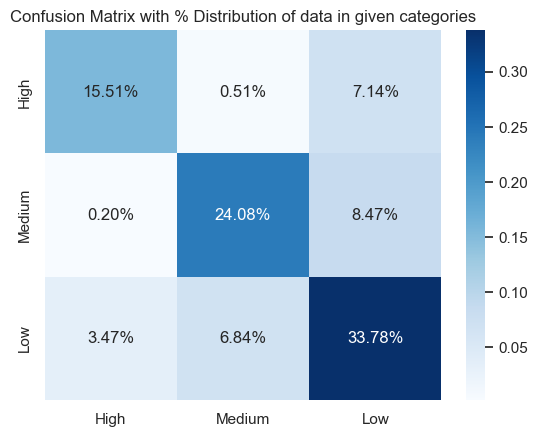

In [472]:
#Best model by far so far Random forest classifer
cf_matrix = confusion_matrix(y_test,preds_RFClass)
#Get the confusion matrix

print(cf_matrix)
#ACCURACY REPORT ON BEST COMBINATION
#RANDOM FOREST CLASSIFICATION REPORT:                precision    recall  f1-score   support
#
#        high       0.81      0.67      0.73       227
#         low       0.77      0.74      0.75       321
#      medium       0.68      0.77      0.72       432
#
#    accuracy                           0.73       980
#   macro avg       0.75      0.72      0.74       980
#weighted avg       0.74      0.73      0.73       980

#SIXTH ITER CONFUSION MATRIX
    #CHANGED: changed boundaries for low, mediums and highs
#array([[157,   4,  66],
#       [  2, 237,  82],
#       [ 34,  73, 325]], dtype=int64)


#CONCLUSIONS
    #Removed outlier super lows and super highs
#Improved average accuracy to ~70% for each type of prediction
#however, less good at predicting high quality wines correctly

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=['High',"Medium","Low"],
            yticklabels=["High","Medium","Low"])


# Add title
plt.title('Confusion Matrix with % Distribution of data in given categories')

plt.show()

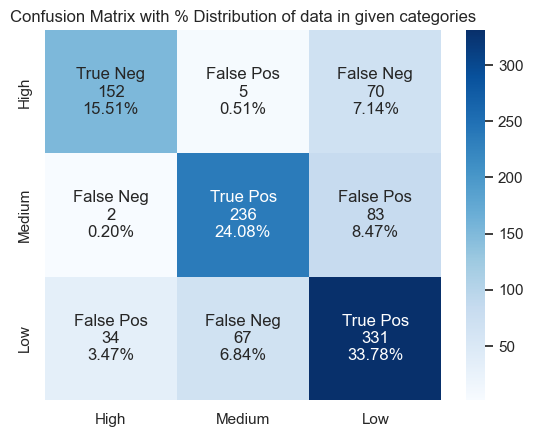

In [475]:
#Plotting confusion matrix 
import seaborn as sns

sns.set()

#labels = ["True Neg","False Pos","False Neg","False Neg","True Pos","False Pos","False Pos","False Neg","True Pos"]
#labels = np.asarray(labels).reshape(3,3)
#sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")


group_names = ["True Neg","False Pos","False Neg","False Neg","True Pos","False Pos","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',xticklabels=['High',"Medium","Low"],
            yticklabels=["High","Medium","Low"])
# Add title
plt.title('Confusion Matrix with % Distribution of data in given categories')

plt.show()
